In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D,  MaxPool1D, LSTM, SimpleRNN
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
num_words = 10000
max_news_len = 400
input_dir='/content/drive/My Drive/true-fake news/'

In [ ]:
fake = pd.read_csv(input_dir + "Fake.csv")
true = pd.read_csv(input_dir + "True.csv")
true["class"] = 1
fake["class"] = 0
data = true.append(fake, ignore_index = True)
news = data["text"]

In [ ]:
def text_prepararion(sentences):
  tmp = []
  for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
  return tmp


In [ ]:
x = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in data["text"].values:
    sentences = nltk.sent_tokenize(par)
    tmp = text_prepararion(sentences)
    x.append(tmp)

In [ ]:
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(x)

In [ ]:
y_train = data["class"]
x_train = tokenizer.texts_to_sequences(news)
x_train = pad_sequences(x_train, maxlen=max_news_len)

# usinf CNN model

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 32, input_length=max_news_len))
model.add(Conv1D(activation='relu', filters=4, kernel_size=4))
model.add(MaxPool1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 397, 4)            516       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 198, 4)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 388,741
Trainable params: 388,741
Non-trainable params: 0
__________________________________________________

In [ ]:
EPOCHS = 10
BATCH_SIZE =1000

history = model.fit(x_train, 
                    y_train, 
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)
                  

Epoch 1/10
36/36 [==============================] - 21s 202ms/step - loss: 0.6129 - acc: 0.6232 - val_loss: 1.2326 - val_acc: 0.2461
Epoch 2/10
36/36 [==============================] - 6s 177ms/step - loss: 0.2129 - acc: 0.9274 - val_loss: 0.3623 - val_acc: 0.8923
Epoch 3/10
36/36 [==============================] - 7s 182ms/step - loss: 0.1057 - acc: 0.9658 - val_loss: 0.3658 - val_acc: 0.9131
Epoch 4/10
36/36 [==============================] - 6s 179ms/step - loss: 0.1849 - acc: 0.9397 - val_loss: 0.2767 - val_acc: 0.9141
Epoch 5/10
36/36 [==============================] - 6s 180ms/step - loss: 0.0619 - acc: 0.9819 - val_loss: 0.6990 - val_acc: 0.8237
Epoch 6/10
36/36 [==============================] - 6s 180ms/step - loss: 0.0448 - acc: 0.9876 - val_loss: 0.1995 - val_acc: 0.9427
Epoch 7/10
36/36 [==============================] - 7s 181ms/step - loss: 0.0236 - acc: 0.9940 - val_loss: 0.2632 - val_acc: 0.9249
Epoch 8/10
36/36 [==============================] - 6s 180ms/step - loss: 0

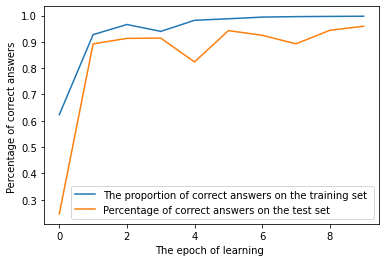

In [ ]:
plt.plot(history.history['acc'], 
         label='The proportion of correct answers on the training set ')
plt.plot(history.history['val_acc'], 
         label='Percentage of correct answers on the test set')
plt.xlabel('The epoch of learning ')
plt.ylabel('Percentage of correct answers ')
plt.legend()
plt.show()

# using RNN model 

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(num_words, 2, input_length=max_news_len))
rnn_model.add(SimpleRNN(8))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
EPOCHS = 5
BATCH_SIZE =100

rnn_history = rnn_model.fit(x_train, 
                    y_train, 
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)

Epoch 1/5
360/360 [==============================] - 196s 540ms/step - loss: 0.4465 - accuracy: 0.8167 - val_loss: 1.0789 - val_accuracy: 0.3598
Epoch 2/5
360/360 [==============================] - 192s 533ms/step - loss: 0.2065 - accuracy: 0.9263 - val_loss: 0.9125 - val_accuracy: 0.6108
Epoch 3/5
360/360 [==============================] - 196s 545ms/step - loss: 0.1060 - accuracy: 0.9628 - val_loss: 0.3082 - val_accuracy: 0.9012
Epoch 4/5
360/360 [==============================] - 198s 550ms/step - loss: 0.0712 - accuracy: 0.9758 - val_loss: 0.2862 - val_accuracy: 0.9148
Epoch 5/5
360/360 [==============================] - 199s 552ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.2345 - val_accuracy: 0.9346
